In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv("train.csv")
waltest = pd.read_csv('test.csv')

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null object
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 39.5+ MB


In [4]:
data_df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,68113152929,-1,FINANCIAL SERVICES,1000
1,30,7,Friday,60538815980,1,SHOES,8931
2,30,7,Friday,7410811099,1,PERSONAL CARE,4504
3,26,8,Friday,2238403510,2,PAINT AND ACCESSORIES,3565
4,26,8,Friday,2006613744,2,PAINT AND ACCESSORIES,1017


In [5]:
data_df.columns

Index([u'TripType', u'VisitNumber', u'Weekday', u'Upc', u'ScanCount',
       u'DepartmentDescription', u'FinelineNumber'],
      dtype='object')

In [6]:
%matplotlib inline

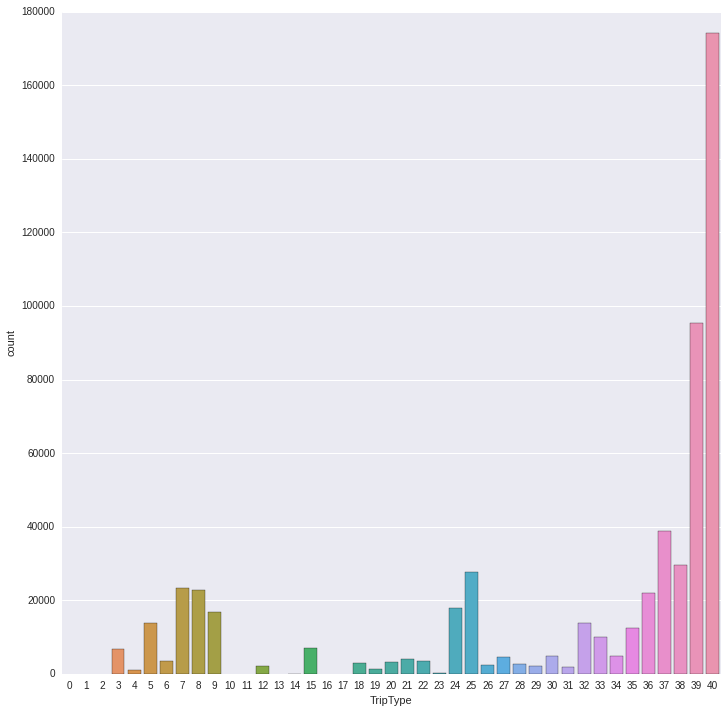

In [7]:
list_order = range(41)
sns.factorplot('TripType',kind="count",data=data_df,size=10,order=list_order)

In [8]:
waltrain = data_df[data_df.FinelineNumber.notnull()] 
waltrain_part = waltrain[:]
waltest_part = waltest[:] 

In [9]:
waltrain_part.count()

TripType                 642925
VisitNumber              642925
Weekday                  642925
Upc                      642925
ScanCount                642925
DepartmentDescription    642925
FinelineNumber           642925
dtype: int64

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
x = waltrain_part[['Weekday', 'DepartmentDescription']]
y = waltrain_part[['TripType']]

In [26]:
x = pd.get_dummies(x)
x

,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,DepartmentDescription_1-HR PHOTO,DepartmentDescription_ACCESSORIES,DepartmentDescription_AUTOMOTIVE,...,DepartmentDescription_SEAFOOD,DepartmentDescription_SEASONAL,DepartmentDescription_SERVICE DELI,DepartmentDescription_SHEER HOSIERY,DepartmentDescription_SHOES,DepartmentDescription_SLEEPWEAR/FOUNDATIONS,DepartmentDescription_SPORTING GOODS,DepartmentDescription_SWIMWEAR/OUTERWEAR,DepartmentDescription_TOYS,DepartmentDescription_WIRELESS
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
z = waltest_part[['Weekday', 'DepartmentDescription']]

In [28]:
zend = pd.DataFrame({'Weekday': ['Sunday'], 'DepartmentDescription': ['HEALTH AND BEAUTY AIDS']}, index = [len(z)])

In [33]:
z = pd.get_dummies(z)
z.columns

Index([u'Weekday_Friday', u'Weekday_Monday', u'Weekday_Saturday',
       u'Weekday_Sunday', u'Weekday_Thursday', u'Weekday_Tuesday',
       u'Weekday_Wednesday', u'DepartmentDescription_1-HR PHOTO',
       u'DepartmentDescription_ACCESSORIES',
       u'DepartmentDescription_AUTOMOTIVE', u'DepartmentDescription_BAKERY',
       u'DepartmentDescription_BATH AND SHOWER',
       u'DepartmentDescription_BEAUTY', u'DepartmentDescription_BEDDING',
       u'DepartmentDescription_BOOKS AND MAGAZINES',
       u'DepartmentDescription_BOYS WEAR',
       u'DepartmentDescription_BRAS & SHAPEWEAR',
       u'DepartmentDescription_CAMERAS AND SUPPLIES',
       u'DepartmentDescription_CANDY, TOBACCO, COOKIES',
       u'DepartmentDescription_CELEBRATION',
       u'DepartmentDescription_COMM BREAD',
       u'DepartmentDescription_CONCEPT STORES',
       u'DepartmentDescription_COOK AND DINE', u'DepartmentDescription_DAIRY',
       u'DepartmentDescription_DSD GROCERY',
       u'DepartmentDescription_ELECTRO

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation 
#model = RandomForestClassifier(
#    random_state=1,
#    n_estimators=100,
#    min_samples_split=8,
#    min_samples_leaf=6
#)
predictors = x.columns
scores = cross_validation.cross_val_score(model,x,waltrain_part['TripType'],cv=3)
    
print(scores.mean())

0.33493795788


In [31]:
model.fit(x, y) 
print "The model coefficients are:"
print model.coef_ 
print "The intercepts are:" 
print model.intercept_ 

The model coefficients are:
[[-0.49503628 -0.90175789 -0.83561419 ...,  0.12769307 -0.56959709
  -0.15487535]
 [-0.88119796 -1.01058737 -0.97502648 ..., -0.27433266 -0.16792926
  -0.49311294]
 [-0.5764226  -0.55980121 -0.67948822 ..., -1.65609533 -1.09433267
  -0.52450002]
 ..., 
 [-0.40601499 -0.51838814 -0.55672944 ...,  0.35157497  0.54266238
  -0.99367105]
 [-0.45553049 -0.53370399 -0.25548245 ...,  0.28388887  0.34206851
  -1.17404637]
 [-0.40823954 -0.34867546 -0.54383352 ...,  1.52547057  0.28003091
   1.11221329]]
The intercepts are:
[-5.46868291 -6.79286678 -3.99846313 -5.42382247 -4.0440081  -4.03709498
 -2.97814988 -5.63080232 -8.70292618 -4.48688131 -5.21491175 -5.71106475
 -5.32105917 -5.22538431 -4.57236082 -7.1058642  -3.37622212 -2.94889129
 -5.31311822 -4.96481018 -5.28904414 -5.37525188 -4.49096391 -5.77396701
 -3.9406734  -4.45489335 -5.06271093 -4.63083205 -3.63645664 -3.54610703
 -3.83293275 -2.09899372 -1.78488183 -3.95844339 -2.85468371 -3.91725191
 -2.86916627 -

/home/anil/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
submission = model.predict_proba(z)
submissiondf = pd.DataFrame(submission) 

In [36]:
submissiondf

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.000978,0.000329,0.003450,0.000556,0.003467,0.002741,0.116188,0.000485,0.000065,0.003841,...,0.014565,0.001749,0.006030,0.041828,0.041383,0.005670,0.118414,0.023391,0.053112,0.098993
1,0.000308,0.000231,0.004566,0.000300,0.001296,0.001983,0.151215,0.000544,0.000057,0.005410,...,0.014236,0.003684,0.011335,0.045807,0.034069,0.006876,0.115514,0.028462,0.069723,0.084344
2,0.000308,0.000231,0.004566,0.000300,0.001296,0.001983,0.151215,0.000544,0.000057,0.005410,...,0.014236,0.003684,0.011335,0.045807,0.034069,0.006876,0.115514,0.028462,0.069723,0.084344
3,0.000660,0.001377,0.012270,0.003729,0.031106,0.055718,0.030418,0.002562,0.000025,0.028135,...,0.024136,0.027317,0.114203,0.177696,0.178964,0.002873,0.039147,0.022005,0.027073,0.013622
4,0.008452,0.000419,0.010504,0.000870,0.003372,0.002721,0.354924,0.000743,0.000075,0.006956,...,0.006901,0.002689,0.012923,0.035382,0.011588,0.005240,0.145889,0.011464,0.023708,0.152972
5,0.000897,0.000318,0.009438,0.000855,0.007663,0.005890,0.114194,0.001463,0.000018,0.013071,...,0.022297,0.011572,0.026893,0.111427,0.119149,0.008947,0.146293,0.033293,0.062490,0.068080
6,0.001284,0.000286,0.009840,0.000913,0.006019,0.006940,0.218992,0.000892,0.000055,0.008048,...,0.017086,0.004320,0.014436,0.070801,0.043957,0.021173,0.148059,0.051797,0.058191,0.082522
7,0.001284,0.000286,0.009840,0.000913,0.006019,0.006940,0.218992,0.000892,0.000055,0.008048,...,0.017086,0.004320,0.014436,0.070801,0.043957,0.021173,0.148059,0.051797,0.058191,0.082522
8,0.001480,0.000470,0.005708,0.000377,0.002606,0.001516,0.175433,0.000239,0.000037,0.004182,...,0.013215,0.002695,0.005927,0.043314,0.021066,0.009339,0.115694,0.022097,0.040110,0.057272
9,0.001480,0.000470,0.005708,0.000377,0.002606,0.001516,0.175433,0.000239,0.000037,0.004182,...,0.013215,0.002695,0.005927,0.043314,0.021066,0.009339,0.115694,0.022097,0.040110,0.057272


In [37]:
submissiondf.drop(len(submissiondf)-1)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.000978,0.000329,0.003450,0.000556,0.003467,0.002741,0.116188,0.000485,0.000065,0.003841,...,0.014565,0.001749,0.006030,0.041828,0.041383,0.005670,0.118414,0.023391,0.053112,0.098993
1,0.000308,0.000231,0.004566,0.000300,0.001296,0.001983,0.151215,0.000544,0.000057,0.005410,...,0.014236,0.003684,0.011335,0.045807,0.034069,0.006876,0.115514,0.028462,0.069723,0.084344
2,0.000308,0.000231,0.004566,0.000300,0.001296,0.001983,0.151215,0.000544,0.000057,0.005410,...,0.014236,0.003684,0.011335,0.045807,0.034069,0.006876,0.115514,0.028462,0.069723,0.084344
3,0.000660,0.001377,0.012270,0.003729,0.031106,0.055718,0.030418,0.002562,0.000025,0.028135,...,0.024136,0.027317,0.114203,0.177696,0.178964,0.002873,0.039147,0.022005,0.027073,0.013622
4,0.008452,0.000419,0.010504,0.000870,0.003372,0.002721,0.354924,0.000743,0.000075,0.006956,...,0.006901,0.002689,0.012923,0.035382,0.011588,0.005240,0.145889,0.011464,0.023708,0.152972
5,0.000897,0.000318,0.009438,0.000855,0.007663,0.005890,0.114194,0.001463,0.000018,0.013071,...,0.022297,0.011572,0.026893,0.111427,0.119149,0.008947,0.146293,0.033293,0.062490,0.068080
6,0.001284,0.000286,0.009840,0.000913,0.006019,0.006940,0.218992,0.000892,0.000055,0.008048,...,0.017086,0.004320,0.014436,0.070801,0.043957,0.021173,0.148059,0.051797,0.058191,0.082522
7,0.001284,0.000286,0.009840,0.000913,0.006019,0.006940,0.218992,0.000892,0.000055,0.008048,...,0.017086,0.004320,0.014436,0.070801,0.043957,0.021173,0.148059,0.051797,0.058191,0.082522
8,0.001480,0.000470,0.005708,0.000377,0.002606,0.001516,0.175433,0.000239,0.000037,0.004182,...,0.013215,0.002695,0.005927,0.043314,0.021066,0.009339,0.115694,0.022097,0.040110,0.057272
9,0.001480,0.000470,0.005708,0.000377,0.002606,0.001516,0.175433,0.000239,0.000037,0.004182,...,0.013215,0.002695,0.005927,0.043314,0.021066,0.009339,0.115694,0.022097,0.040110,0.057272


In [44]:
dex = waltest.iloc[:,0]

In [45]:
dex

0              1
1              1
2              1
3              1
4              2
5              2
6              2
7              2
8              3
9              3
10             4
11             6
12             6
13            13
14            13
15            14
16            14
17            14
18            14
19            14
20            14
21            14
22            14
23            14
24            14
25            16
26            16
27            16
28            16
29            16
           ...  
653616    191338
653617    191338
653618    191338
653619    191338
653620    191338
653621    191338
653622    191338
653623    191339
653624    191339
653625    191339
653626    191339
653627    191339
653628    191340
653629    191341
653630    191341
653631    191341
653632    191341
653633    191341
653634    191341
653635    191341
653636    191341
653637    191341
653638    191341
653639    191348
653640    191348
653641    191348
653642    191348
653643    1913

In [61]:
submurge = pd.concat([dex,submissiondf], axis = 1)

In [62]:
avgmurg = submurge.groupby(submurge.VisitNumber).mean()

In [63]:
avgmurg.head()

,VisitNumber,0,1,2,3,4,5,6,7,8,...,28,29,30,31,32,33,34,35,36,37
VisitNumber,,,,,,,,,,,,,,,,,,,,,
1,1,0.000563,0.000542,0.006213,0.001221,0.009291,0.015606,0.112259,0.001034,0.000051,...,0.016793,0.009108,0.035726,0.077785,0.072121,0.005574,0.097147,0.025580,0.054907,0.070326
2,2,0.002979,0.000327,0.009906,0.000888,0.005768,0.005623,0.226775,0.000997,0.000051,...,0.015843,0.005725,0.017172,0.072103,0.054663,0.014133,0.147075,0.037088,0.050645,0.096524
3,3,0.001480,0.000470,0.005708,0.000377,0.002606,0.001516,0.175433,0.000239,0.000037,...,0.013215,0.002695,0.005927,0.043314,0.021066,0.009339,0.115694,0.022097,0.040110,0.057272
4,4,0.000951,0.000311,0.008521,0.001538,0.003506,0.006277,0.144765,0.001137,0.000186,...,0.024476,0.003832,0.015362,0.046030,0.034972,0.005926,0.179727,0.048940,0.060284,0.030058
6,6,0.000699,0.000406,0.009177,0.000887,0.004901,0.002337,0.170512,0.000261,0.000048,...,0.021116,0.004424,0.013386,0.041831,0.026494,0.021612,0.139481,0.029194,0.043611,0.037994


In [64]:
avgmurg.reset_index(drop = True, inplace = True)

In [65]:
avgmurg.head()

,VisitNumber,0,1,2,3,4,5,6,7,8,...,28,29,30,31,32,33,34,35,36,37
0,1,0.000563,0.000542,0.006213,0.001221,0.009291,0.015606,0.112259,0.001034,0.000051,...,0.016793,0.009108,0.035726,0.077785,0.072121,0.005574,0.097147,0.025580,0.054907,0.070326
1,2,0.002979,0.000327,0.009906,0.000888,0.005768,0.005623,0.226775,0.000997,0.000051,...,0.015843,0.005725,0.017172,0.072103,0.054663,0.014133,0.147075,0.037088,0.050645,0.096524
2,3,0.001480,0.000470,0.005708,0.000377,0.002606,0.001516,0.175433,0.000239,0.000037,...,0.013215,0.002695,0.005927,0.043314,0.021066,0.009339,0.115694,0.022097,0.040110,0.057272
3,4,0.000951,0.000311,0.008521,0.001538,0.003506,0.006277,0.144765,0.001137,0.000186,...,0.024476,0.003832,0.015362,0.046030,0.034972,0.005926,0.179727,0.048940,0.060284,0.030058
4,6,0.000699,0.000406,0.009177,0.000887,0.004901,0.002337,0.170512,0.000261,0.000048,...,0.021116,0.004424,0.013386,0.041831,0.026494,0.021612,0.139481,0.029194,0.043611,0.037994


In [66]:
avgmurg.columns = ['VisitNumber', 'TripType_3','TripType_4','TripType_5','TripType_6','TripType_7', 'TripType_8','TripType_9','TripType_12','TripType_14','TripType_15','TripType_18', 'TripType_19','TripType_20','TripType_21','TripType_22','TripType_23','TripType_24','TripType_25','TripType_26','TripType_27','TripType_28','TripType_29','TripType_30', 'TripType_31','TripType_32','TripType_33','TripType_34','TripType_35','TripType_36', 'TripType_37','TripType_38','TripType_39','TripType_40','TripType_41','TripType_42','TripType_43','TripType_44','TripType_999'] 

In [67]:
avgmurg['VisitNumber'] = avgmurg['VisitNumber'].astype(int) 

In [68]:
avgmurg.to_csv('KaggleSubmission.csv', index = False)